In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math as mt
import warnings

# 한글출력
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings(action='ignore') 

from src import crs, PublicPredictor
from src.dbc import utils, TimeDivisionKMeans

In [3]:
# 1. load_excel
data_path = "data/apt_1.xlsx"
xlsx = pd.read_excel(data_path, header=None,
                     skiprows=2, engine="openpyxl")

# 2. data preprocessing
p, m = crs.utils.data_preprocessing(xlsx)

m.set_index("month", inplace=True)

# 3. data init
_month = 1

month_df = pd.DataFrame(m.loc[_month])
month_df.reset_index(inplace=True)

month_df.columns = ['name', 'usage (kWh)']

PUBLIC_PERCENTAGE = 30
APT = crs.utils.get_APT(month_df, PUBLIC_PERCENTAGE)

calc = crs.models.ManagementOffice(
        month=_month,
        households=month_df,
        APT=APT,
        contract="단일계약"
    )
apt = calc.apart

In [4]:
m_15 = utils.data_preprocessing(xlsx)

df = utils.dimension_reduction(m_15)
m_60 = df.copy()

m_60.head()

m_60_1 = m_60[m_60.index.month == 1].copy()
m_60_1.head()

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2019-01-01 00:00:00,0.033,0.000,0.034,0.037,0.062,0.322,0.240,0.295,0.373,0.243,...,0.534,0.188,0.400,0.318,0.420,0.626,0.484,0.289,0.305,0.652
2019-01-01 01:00:00,0.048,0.000,0.033,0.037,0.063,0.185,0.257,0.397,0.257,0.228,...,0.396,0.434,0.355,0.250,0.465,0.409,0.459,0.336,0.332,0.557
2019-01-01 02:00:00,0.032,0.000,0.039,0.036,0.062,0.175,0.384,0.353,0.123,0.141,...,0.194,0.337,0.379,0.274,0.326,0.307,0.405,0.382,0.311,0.491
2019-01-01 03:00:00,0.033,0.000,0.039,0.037,0.062,0.167,0.276,0.488,0.142,0.159,...,0.286,0.263,0.375,0.264,0.336,0.345,0.298,0.291,0.261,0.511
2019-01-01 04:00:00,0.032,0.001,0.033,0.037,0.063,0.197,0.266,0.278,0.190,0.227,...,0.275,0.245,0.310,0.423,0.360,0.364,0.212,0.347,0.294,0.507


In [5]:
m_60_1.tail()

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2019-01-31 19:00:00,0.082,0.029,0.027,0.252,0.045,0.295,0.513,1.029,0.010,0.517,...,0.243,0.286,0.791,0.321,0.835,0.492,0.603,0.397,0.307,0.434
2019-01-31 20:00:00,0.070,0.029,0.027,0.338,0.044,0.318,0.556,0.239,0.010,0.444,...,0.325,0.328,0.809,0.458,0.749,0.444,0.339,0.285,0.255,0.451
2019-01-31 21:00:00,0.105,0.029,0.025,0.254,0.044,0.374,0.267,0.204,0.029,0.382,...,0.314,0.625,0.404,0.338,0.519,0.345,0.243,0.270,0.367,0.420
2019-01-31 22:00:00,0.064,0.030,0.028,0.276,0.045,0.304,0.217,0.278,0.010,0.221,...,0.280,0.393,0.363,0.367,0.804,0.577,0.262,0.359,0.351,0.596
2019-01-31 23:00:00,0.070,0.028,0.027,0.206,0.044,0.218,0.160,0.471,0.010,0.209,...,0.242,0.209,0.398,0.333,0.677,0.482,0.220,0.335,0.362,0.535


In [6]:
from src import TimeDivisionKMeans

tdKMeans = TimeDivisionKMeans(datas=m_60_1)
tdKMeans.fit()

tdKMeans.cluster_info.head()[
    tdKMeans.cluster_info.columns[:10]
]

1/248 - ECV:84%
11/248 - ECV:78%
21/248 - ECV:85%
31/248 - ECV:86%
41/248 - ECV:86%
51/248 - ECV:82%
61/248 - ECV:88%
71/248 - ECV:85%
81/248 - ECV:88%
91/248 - ECV:83%
101/248 - ECV:86%
111/248 - ECV:82%
121/248 - ECV:89%
131/248 - ECV:79%
141/248 - ECV:83%
151/248 - ECV:87%
161/248 - ECV:84%
171/248 - ECV:77%
181/248 - ECV:81%
191/248 - ECV:83%
201/248 - ECV:88%
211/248 - ECV:80%
221/248 - ECV:84%
231/248 - ECV:80%
241/248 - ECV:87%
248/248 - ECV:86%


,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801
division_round,,,,,,,,,,
0,0,0,0,0,0,1,1,2,1,1
1,1,0,1,1,1,2,3,3,2,2
2,0,0,0,0,0,1,1,1,1,1
3,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,1,1,2,2,1


In [33]:
test = tdKMeans.cluster_info.copy()

array([0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 2, 3, 1, 3, 2, 4, 2, 2, 2, 2, 3, 1,
       2, 3, 2, 2, 1, 2, 3, 2, 3, 2, 1, 1, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3,
       2, 2, 3, 2, 2, 1, 2, 3, 3, 2, 2, 2, 1, 1, 2, 2, 3, 2, 4, 3, 3, 3,
       1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 4, 3, 2, 2, 3, 2, 3, 2,
       3, 3, 3, 2, 3, 2, 4, 2, 3, 3, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2])

In [58]:
group_df = pd.DataFrame(np.column_stack([m_60_1.columns,
    m_60_1.sum(axis=0).round().astype("int")]), columns=["name", "usage (kWh)"])

group_df['label'] = test.mean(axis=0).round().astype("int").values
# group_df['label'] = tdKMeans.groups_
uni_labels = np.unique(group_df['label'].values)
anomaly = pd.DataFrame()

for idx, _label in enumerate(uni_labels[:-1]):
    _now = group_df[group_df['label'] == _label]
    _next = group_df[group_df['label'] == (_label + 1)]
    _chk = (_now['usage (kWh)'] > _next['usage (kWh)'].min()).values

    _anomaly = _now[_chk]
    if len(_anomaly) != 0:
        anomaly = anomaly.append(_anomaly, ignore_index=True)

anomaly

,name,usage (kWh),label
0,아파트1-101-402,345,2
1,아파트1-103-106,351,2


In [37]:
test.mean(axis=0).round().astype("int")

아파트1-104-1206    0
아파트1-104-303     0
아파트1-104-1307    0
아파트1-104-1208    0
아파트1-104-408     0
                ..
아파트1-103-903     2
아파트1-103-1106    2
아파트1-103-705     2
아파트1-103-1505    3
아파트1-103-406     2
Length: 108, dtype: int64

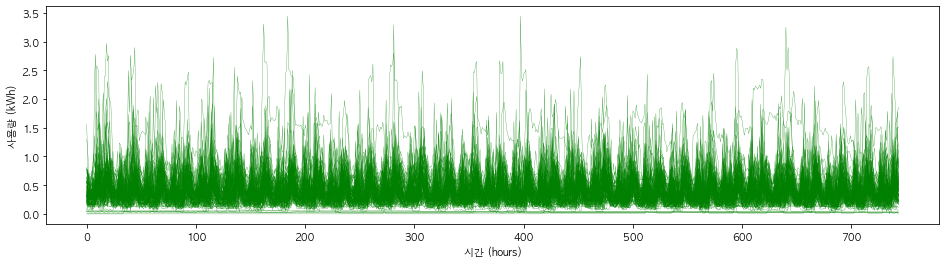

In [7]:
plt.figure(figsize=(16,4))

plt.plot(m_60_1.to_numpy(), color='g', linewidth=0.25)
plt.xlabel("시간 (hours)")
plt.ylabel("사용량 (kWh)")

plt.show()

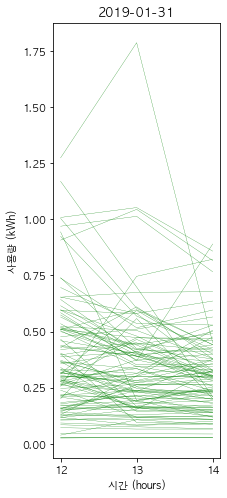

In [18]:
tdKMeans.draw_division_plot(division_round=244)

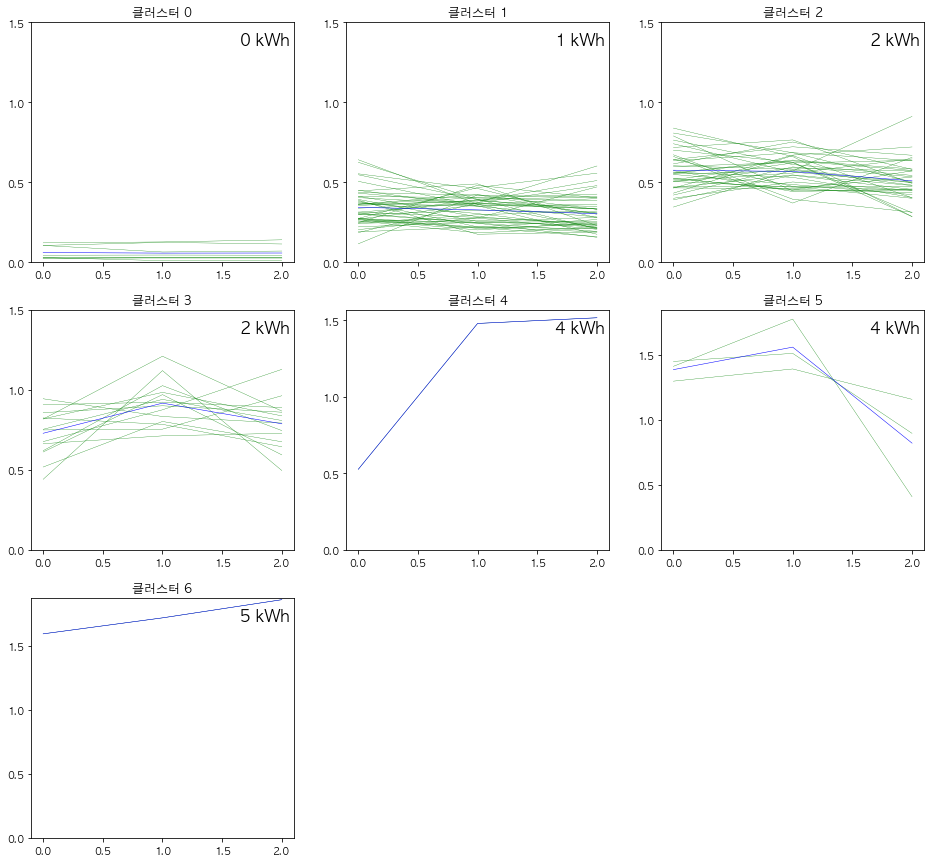

In [25]:
tdKMeans.kmeans_[247].draw_plot()